<a href="https://www.kaggle.com/code/kamelhassan/diabetes-prediction-project?scriptVersionId=203992992" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/kaggle/input/dataset/diabetes.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Check for missing values (0s in 'Insulin' and 'SkinThickness' columns)**

In [5]:
print("\nMissing values (represented by 0):")
print((df == 0).sum())


Missing values (represented by 0):
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [6]:
#another way 
df.duplicated().sum()

0

In [7]:
df.shape


(768, 9)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**Replace 0 in Insulin and SkinThickness with the median of the respective columns**

In [10]:
df['Insulin'].replace(0, np.nan, inplace=True)
df['SkinThickness'].replace(0, np.nan, inplace=True)
df.fillna(df.median(), inplace=True)

/tmp/ipykernel_17/4211755919.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Insulin'].replace(0, np.nan, inplace=True)
/tmp/ipykernel_17/4211755919.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,125.0,33.6,0.627,50,1
1,1,85,66,29.0,125.0,26.6,0.351,31,0
2,8,183,64,29.0,125.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


# **Visualization**

In [12]:
correlation_matrix = df.corr()

* **قياس قوة العلاقة:
* 
* معامل الارتباط يكون بين -1 و +1.
* +1 يعني أن هناك علاقة ارتباط إيجابية مثالية (عندما يزيد أحد المتغيرين، يزيد الآخر).
* -1 يعني أن هناك علاقة ارتباط سلبية مثالية (عندما يزيد أحد المتغيرين، يقل الآخر).
* 0 يعني عدم وجود ارتباط أو أن العلاقة ضعيفة جدًا بين المتغيرين.
* **

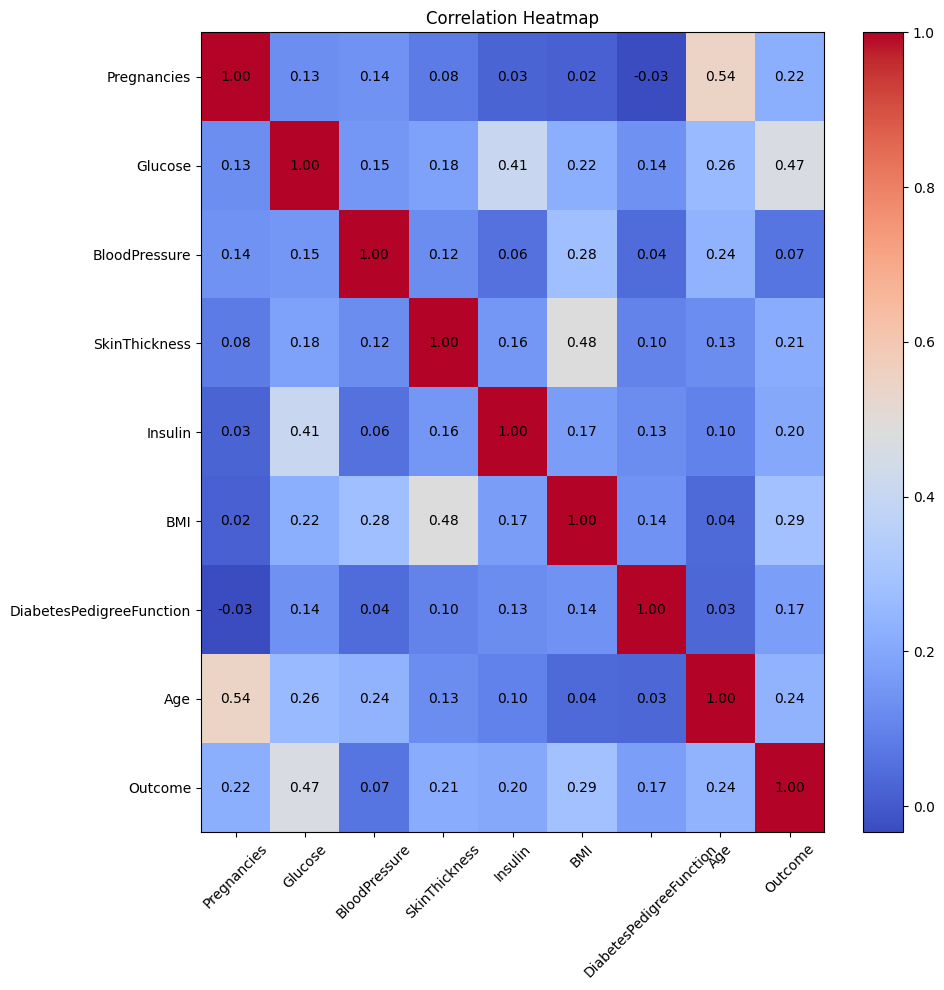

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()

# Add the labels for x and y axes
plt.xticks(np.arange(len(df.columns)), df.columns, rotation=45)
plt.yticks(np.arange(len(df.columns)), df.columns)

plt.title('Correlation Heatmap')

# Add the correlation values as text in the heatmap
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

**Another Way using Seaborn**

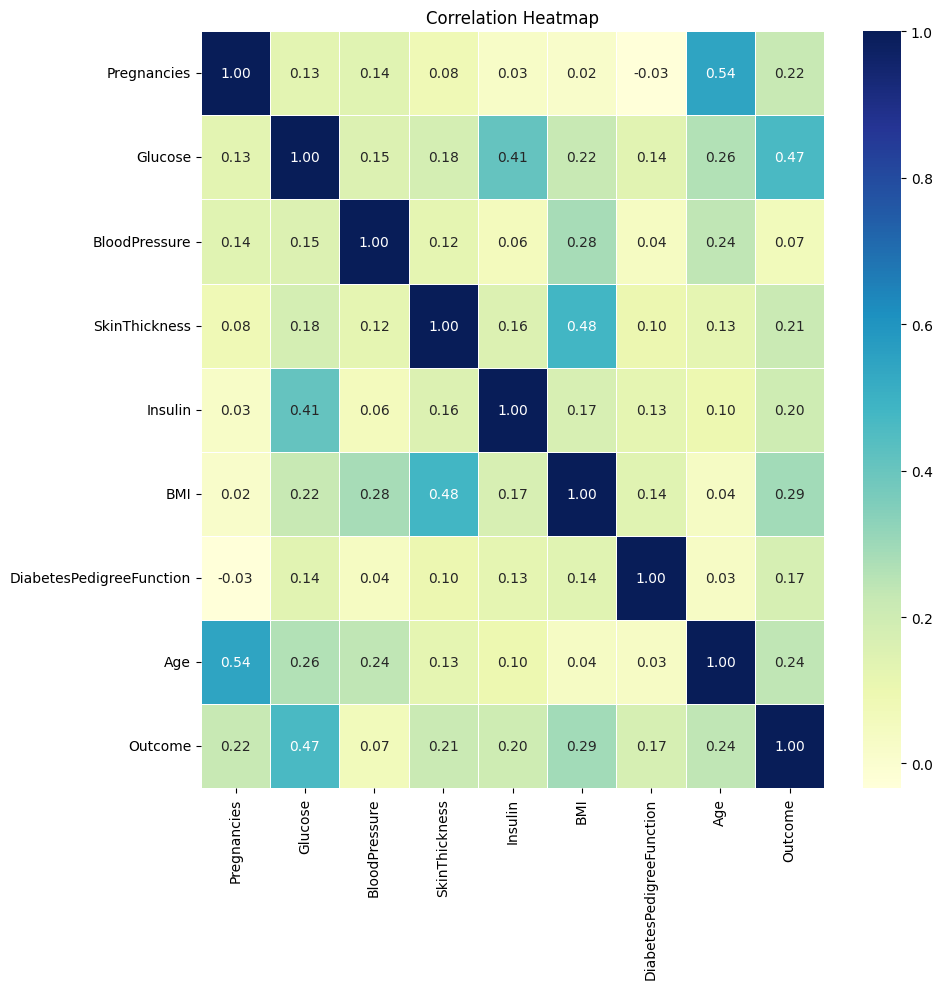

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)

#لو عوزت تغير اللون غير القيمة اللى موجودة ف السي ماب 
# لو عوزت تخفى الارقام من على المربعات خلى annot False
plt.title('Correlation Heatmap')


plt.tight_layout()
plt.show()

**Histogram of each variable**

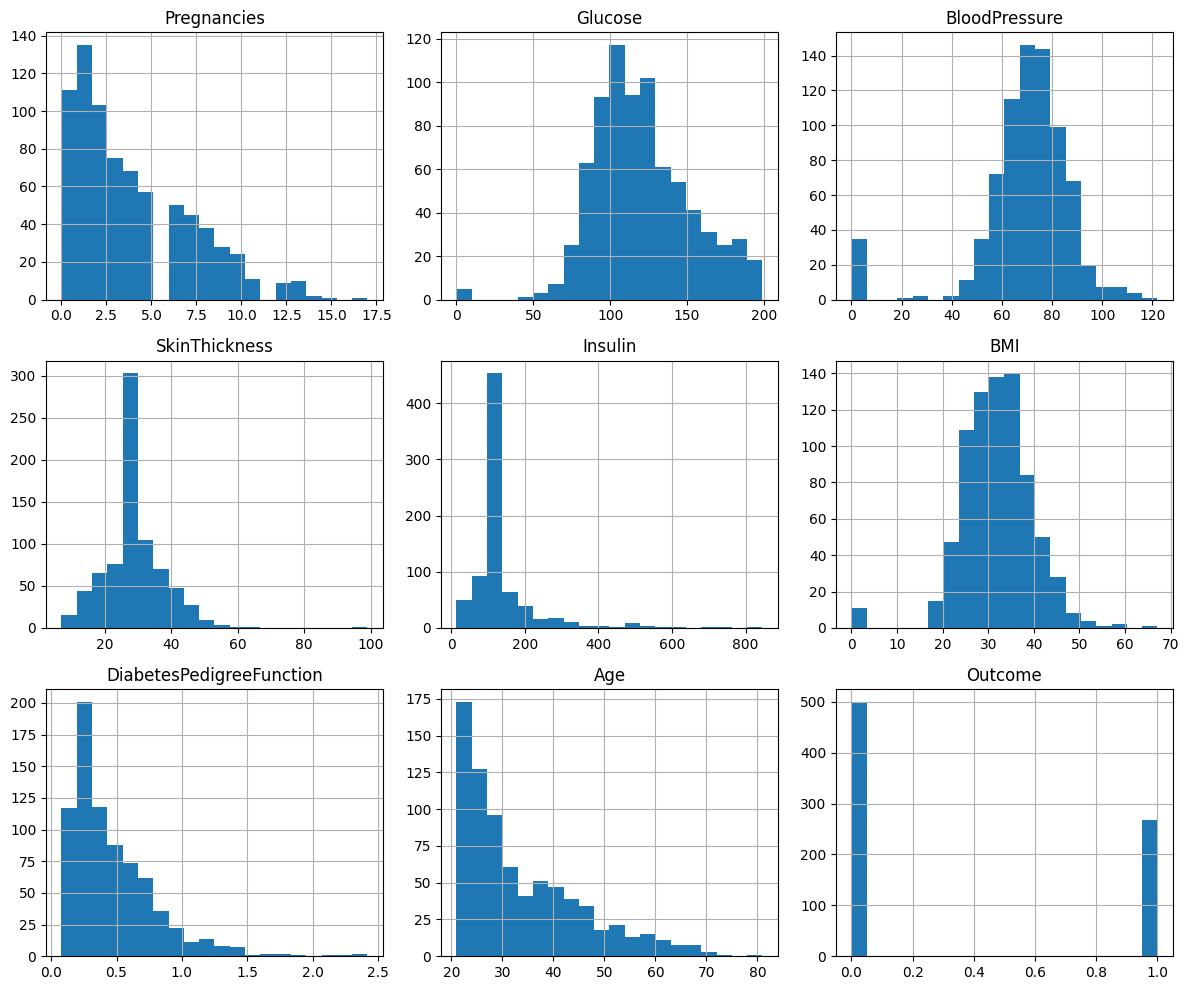

In [15]:
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

**Scatter plot: BMI vs. Age (colored by Outcome)**

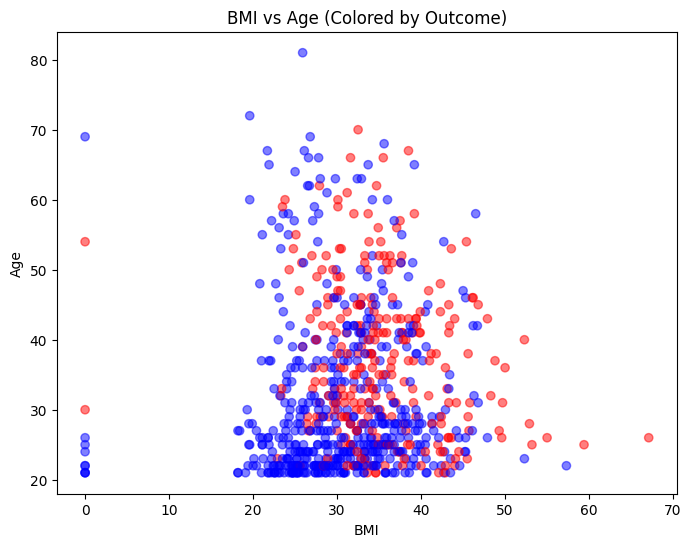

In [16]:
plt.figure(figsize=(8, 6))
colors = {0: 'blue', 1: 'red'}
plt.scatter(df['BMI'], df['Age'], c=df['Outcome'].apply(lambda x: colors[x]), alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('BMI vs Age (Colored by Outcome)')
plt.show()

**اللون الأزرق: يمكن أن يمثل الأشخاص الذين لا يعانون من السكري
(Outcome = 0).
اللون الأحمر: يمكن أن يمثل الأشخاص الذين يعانون من السكري
(Outcome = 1).**
**يظهر التوزيع أن الأشخاص الأكبر سنًا موزعين بشكل متساوي بين النتائج السلبية والإيجابية للسكري**

# bar plot

In [17]:
#حساب متوسط الجلوكوز لكل Outcome
mean_glucose = df.groupby('Outcome')['Glucose'].mean()

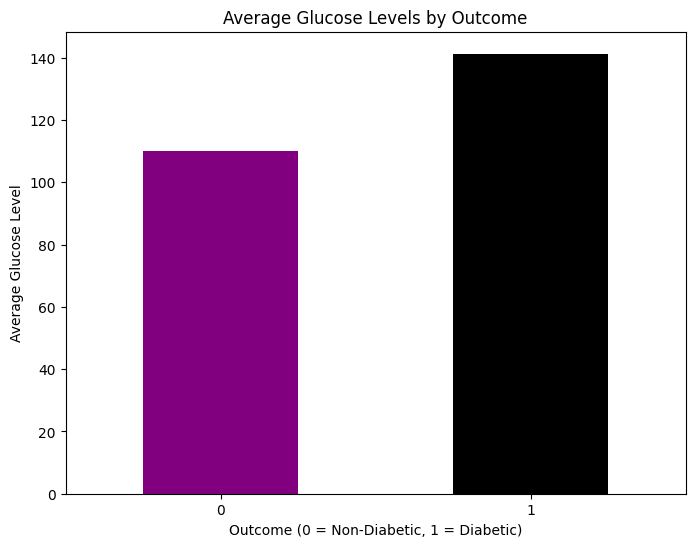

In [18]:

plt.figure(figsize=(8, 6))
mean_glucose.plot(kind='bar', color=['purple', 'black'])
plt.title('Average Glucose Levels by Outcome')
plt.xlabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Average Glucose Level')
plt.xticks(rotation=0)  # Rotates labels to be horizontal
plt.show()